In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Computation
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
import wave

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

%matplotlib inline

# Samples and Sampling Rate 

Checking if the training and testing data have the same sampling rate and samples.

In [35]:
train_audio_path = 'train/audio'
test_audio_path = 'test/audio'

folders_tr = os.listdir(train_audio_path)
files_ts = os.listdir(test_audio_path)

sr_tr = []
sr_ts = []

s_tr =[]
s_ts =[]

for folder in folders_tr:
    audio_class_folder = os.path.join(train_audio_path,folder)
    files = os.listdir(audio_class_folder)
    for file in files:
        sample_rate_tr, samples_tr = wavfile.read(os.path.join(audio_class_folder,file))
        sr_tr.append(sample_rate_tr)
        s_tr.append(len(samples_tr))
for file in files_ts:
    sample_rate_ts, samples_ts = wavfile.read(os.path.join(test_audio_path,file))
    sr_ts.append(sample_rate_ts)
    s_ts.append(len(samples_ts))
    
print('Training sampling rate = ',int(np.unique(np.asarray(sr_tr))),'Hz, Testing sampling rate =', int(np.unique(np.asarray(sr_ts))),'Hz')
print('Training samples = ',(np.unique(np.asarray(s_tr))),'\n''Testing samples =', (np.unique(np.asarray(s_ts))))

Training sampling rate =  16000 Hz, Testing sampling rate = 16000 Hz
Training samples =  [ 2496  2928  4064  5945  6144  6688  6827  7339  7431  7510  7851  8022
  8174  8192  8363  8534  8875  8917  9046  9387  9558  9660  9728  9899
 10032 10070 10240 10403 10411 10582 10752 10923 11094 11146 11264 11435
 11520 11606 11776 11889 11947 12118 12261 12288 12459 12480 12630 12632
 12800 12896 12971 13004 13142 13312 13375 13483 13654 13824 13995 14118
 14166 14336 14490 14507 14678 14848 14861 15019 15153 15190 15233 15360
 15473 15531 15604 15702 15793 15872 15976 16000] 
Testing samples = [16000]


We find that although both training and testing set audio files have the same sampling rate, the number of samples and hence the duration of the audio waves varies in the training set.

Now we know that that all the .wav files in both the training and testing sets are sampled at 16000 Hz. By Nyquist theorem, the maximum frequency content in these audio clips will be 8000 Hz. Let us now analyse the distribution of amplitude and frequencies across time of a random audio signal.

In [31]:
file_train = 'no/0bd689d7_nohash_0.wav'
file_test = 'clip_0000adecb.wav'
sample_rate, samples = wavfile.read(os.path.join(train_audio_path,file_train))

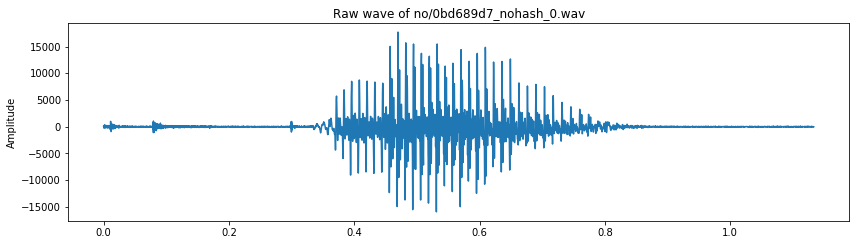

In [33]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + file_train)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), len(samples)), samples)